<div style="float: block; text-align: center; line-height: 1.7em">
    <span style="font-size: 2em; font-weight: bold"> Fatigue-Sleepiness in Irregular Workloads for Pilots </span><br>
    <span style="font-size: 1.5em; font-weight: bold"> Notebook 2 </span><br>
    <span style="font-size: 1.5em"> Exploratory Data Analysis </span><br>
</div>

---

# 1. Loading Required Libraries and Data

see analysis in https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9286802/

In [2]:
import os as os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1.1. Loading data

In [4]:
file = os.path.join('data/processed_features.csv')
df = pd.read_csv(file)
df.head(5)

,Id,kss,sps,time_fill_kss_sps,duty_moment,duty_moment.1,duty_start_time,duty_start_cat,duty_end_time,duty_end_cat,...,Num_Sons,Flight_hours,Education,Marital_status,Time_displacement,Age,Classification,Disturbed_sleep,Awakening,Sleep_Fatig
0,P01,5,4.0,AFT,start,start,15.916667,AFT,0.800000,NI,...,2,17000.0,PHD,MARRIED,60,49,INT,13,9,14
1,P01,5,5.0,EVE,middle,middle,15.916667,AFT,0.800000,NI,...,2,17000.0,PHD,MARRIED,60,49,INT,13,9,14
2,P01,7,6.0,NI,end,end,15.916667,AFT,0.800000,NI,...,2,17000.0,PHD,MARRIED,60,49,INT,13,9,14
3,P01,7,5.0,EM,start,start,5.666667,EM,11.116667,MOR,...,2,17000.0,PHD,MARRIED,60,49,INT,13,9,14
4,P01,4,3.0,MOR,middle,middle,5.666667,EM,11.116667,MOR,...,2,17000.0,PHD,MARRIED,60,49,INT,13,9,14


---

# 2. Response Variables or Targets

The problem to be solved presents two response variables or targets, the **Karolinska's perception of sleepiness scale** and **Sam-Perelli's perception of fatigue scale**, shown bellow:

* **Karolinska Sleepiness Scale (kss)**

| Scale | Original meaning as in google questionnaries (Portuguese) | English Translation |
| --- | --- | --- |
| 1 | Muito Alerta | Extremely alert |
| 2 - 3 | Alerta | Alert |
| 4 - 5 | Nem sonolento, nem alerta | Nor sleepy, nor alert |
| 6 - 7 | Sonolento, mas consigo ficar acordado | Drowsy, but I can stay awake |
| 8 - 9 | Muito sonolento, brigando com o sono | Very drowsy, fighting with sleep |

* **Sam-Perelli Fatigue Scale (sps)**

| Scale | Original meaning as in google questionnaries (Portuguese) | English Translation |
| --- | --- | --- |
| 1 | Totalmente alerta, bem desperto, extremamente disposto | Fully alert, wide awake, extremely willing |
| 2 | Muito ativo, responsivo, mas não em nível máximo | Very active, responsive, but not at maximum level |
| 3 | Bem, relativamente revigorado | Well, relatively refreshed |
| 4 | Um pouco cansado, não totalmente disposto | A little tired, not quite in the mood |
| 5 | Moderadamente cansado, enfraquecido | Moderately tired, weakened | 
| 6 | Muito cansado, com dificuldade de concentração | Very tired, with difficulty concentrating |
| 7 | Completamente exausto, incapaz de trabalhar efetivamente | Completely exhausted, unable to work effectively |


## 2.2. Experimental Design (Longitudinal Study)

Both the scales shown were taken repeated times during different times along the day and at three moments along the duty period. The best experimental design that fits this kind of study is the longitudinal or repeated measurements design.

| Participant 1 | Participant 2| (...) | Participant n |
| --- | --- | --- | --- |
| kss<sub>EM</sub> - kss<sub>MOR</sub> - kss<sub>AFT</sub> - kss<sub>EVE</sub> - kss<sub>NI</sub> | kss<sub>EM</sub> - kss<sub>MOR</sub> - kss<sub>AFT</sub> - kss<sub>EVE</sub> - kss<sub>NI</sub> | (...) | kss<sub>EM</sub> - kss<sub>MOR</sub> - kss<sub>AFT</sub> - kss<sub>EVE</sub> - kss<sub>NI</sub> |
| sps<sub>EM</sub> - sps<sub>MOR</sub> - sps<sub>AFT</sub> - sps<sub>EVE</sub> - sps<sub>NI</sub> | sps<sub>EM</sub> - sps<sub>MOR</sub> - sps<sub>AFT</sub> - sps<sub>EVE</sub> - sps<sub>NI</sub> | (...) | sps<sub>EM</sub> - sps<sub>MOR</sub> - sps<sub>AFT</sub> - sps<sub>EVE</sub> - sps<sub>NI</sub> |

## 2.3. Bucketization of Response or Target Variables

Some stduies using Kss and Sps scales works with both scales as being continuous data. However, they are ordinal type of data with numbers ranging from mild to enhanced conditions concerning fatigue and sleepiness perceptions. In terms of modelling and even interpretability, it is better to reduce these results into a binary outcome. In this line of thought we dichotomize or bucketize the kss and sps scales into the following:

* **Karolinska scale dichotomized ( Excessive Sleepiness indicator - kssd)**

| Scale Range | Meaning | Bucketized |
| --- | --- | --- |
| 1 - 6 | Inexistent to Mild Sleepiness | 0 |
| 7 - 9 | Excessive Sleepiness | 1 |

* **Sam-Perelli scale dichotomized (Severe Fatigue indicator - spsd)**

| Scale Range | Meaning | Bucketized |
| --- | --- | --- |
| 1 - 5 | Inexistent to Mild Fatigue | 0 |
| 6 - 7 | Severe Fatigue | 1 |



In [6]:
# Applying the rule

df['kssd'] = df['kss'].apply(lambda x: 1 if x >= 7 else 0)
df['spsd'] = df['sps'].apply(lambda x: 1 if x >= 6 else 0)

In [8]:
print('-------------------------------------------------')
print(f'proportions excessive sleepiness case: {round(df.kssd.sum()/df.kssd.count(),3)}')
print(f'proportions severe fatigue case:       {round(df.spsd.sum()/df.spsd.count(),3)}')
print('-------------------------------------------------')

-------------------------------------------------
proportions excessive sleepiness case: 0.174
proportions severe fatigue case:       0.067
-------------------------------------------------


## 2.4. Getting only working days

The measurements were taken in both workings days and days-off, so the data base was divided to analyze only working days.

In [10]:
working_df = df[df['duty_moment'].isin(['start','middle','end'])]
working_df.head(5)

,Id,kss,sps,time_fill_kss_sps,duty_moment,duty_moment.1,duty_start_time,duty_start_cat,duty_end_time,duty_end_cat,...,Education,Marital_status,Time_displacement,Age,Classification,Disturbed_sleep,Awakening,Sleep_Fatig,kssd,spsd
0,P01,5,4.0,AFT,start,start,15.916667,AFT,0.800000,NI,...,PHD,MARRIED,60,49,INT,13,9,14,0,0
1,P01,5,5.0,EVE,middle,middle,15.916667,AFT,0.800000,NI,...,PHD,MARRIED,60,49,INT,13,9,14,0,0
2,P01,7,6.0,NI,end,end,15.916667,AFT,0.800000,NI,...,PHD,MARRIED,60,49,INT,13,9,14,1,1
3,P01,7,5.0,EM,start,start,5.666667,EM,11.116667,MOR,...,PHD,MARRIED,60,49,INT,13,9,14,1,0
4,P01,4,3.0,MOR,middle,middle,5.666667,EM,11.116667,MOR,...,PHD,MARRIED,60,49,INT,13,9,14,0,0


### 2.4.1. Getting the number of times the kss and sps were filled

In [12]:
print('--------------------------------------------------------------------------------------------')
print(f'Number of observations during working days the participant filled kss and sps scales, {len(working_df)}')
print('--------------------------------------------------------------------------------------------')

--------------------------------------------------------------------------------------------
Number of observations during working days the participant filled kss and sps scales, 1079
--------------------------------------------------------------------------------------------


Text(0.5, 1.0, 'Number of Observations per Participant')

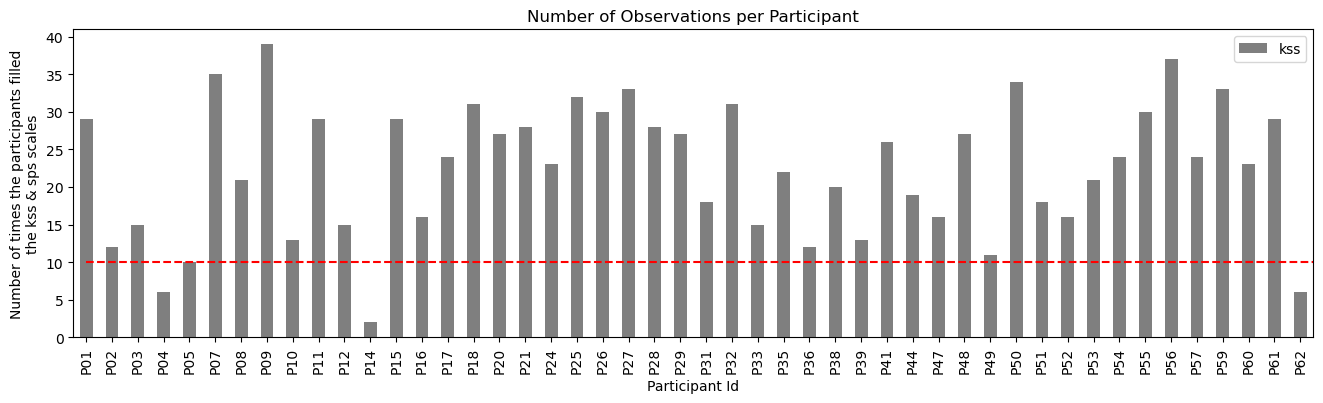

In [14]:
temp = working_df.groupby('Id').agg('count')

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(16,4))
temp.plot.bar(y = 'kss', ax = ax, color = 'black', alpha = 0.5)
ax.hlines(xmin=0, xmax=100, y = 10, color='red', linestyles='dashed')
ax.set_xlabel('Participant Id')
ax.set_ylabel('Number of times the participants filled\nthe kss & sps scales')
ax.set_title('Number of Observations per Participant')

Figure above shows the number of times the participants filled the kss and sps scales along the study duration. As we can see there is an inbalance among the number of times the participant filled the scales. With this result, we will only retain participants that filled the scales at least 10 times, the bars extending above the dashed red line.

In [16]:
# This dataframe is only composed by the participants Id which filled kss and sps scales more than 10 times.
# to be joined with the final dataframe

selected = pd.DataFrame( temp['kss'].copy().loc[temp.kss > 10].index )
selected['select'] = 1

### 2.4.2. Number of times the participant filled scales and moment of workload

In [18]:
print('\033[1m' + '\nContingency table between Time the participants\nfilled the scales and Workload Moment\n')

pd.crosstab(working_df.duty_moment, 
            working_df.time_fill_kss_sps, 
            margins=True, margins_name = 'Sum')\
  .reindex(["start", "middle", "end", "Sum"])[["EM", "MOR", "AFT", "EVE", "NI", "Sum"]]


Contingency table between Time the participants
filled the scales and Workload Moment



time_fill_kss_sps,EM,MOR,AFT,EVE,NI,Sum
duty_moment,,,,,,
start,115,71,79,58,66,389
middle,30,96,83,71,26,306
end,26,62,136,110,50,384
Sum,171,229,298,239,142,1079


Contingency table between the time the participant filled scales and workload moments is shown above, as we can see,

* More observations were taken at AFT period than other periods;
* The participants tend to fill the scales more times at the start and end of workload;
* More observations are found at AFT period in the end of workloads;
* Less observations are found at EM period in the middle of workloads.

## 2.5. Occurrences of Excessive Sleepiness and Severe Fatigue

### 2.5.1. Function Display Side-by-side

In [20]:
from IPython.display import display, HTML

def display_side_by_side(dfs:list, captions:list):
    """Display tables side by side to save vertical space
    Input:
        dfs: list of pandas.DataFrame
        captions: list of table captions
    """
    output = ""
    combined = dict(zip(captions, dfs))
    for caption, df in combined.items():
        output += df.style.set_table_attributes("style='display:inline'").format(precision=2)\
                          .set_caption(caption)._repr_html_()
        output += "\xa0\xa0\xa0"
    display(HTML(output))

### 2.5.2. Duty Moments & Filling Time

In [22]:
# Workload Moment
x1 = pd.crosstab(working_df['kssd'], working_df['duty_moment'], rownames=['Sleepiness'], colnames=['duty'], margins=True, normalize='index')[["start", "middle", "end"]]
x2 = pd.crosstab(working_df['spsd'], working_df['duty_moment'], rownames=['Fatigue'], colnames=['duty'], margins=True, normalize='index')[["start", "middle", "end"]]

# Display
display_side_by_side( [x1,x2], ['(a) Duty Moment-Excessive Sleepiness', '(b) Duty Moment-Severe Fatigue'] )
print(''); print('')

# filling time
x1 = pd.crosstab(working_df['kssd'], working_df['time_fill_kss_sps'], rownames=['Sleepiness'], colnames=['Filling Time'], margins=True, normalize='index')[["EM", "MOR", "AFT", "EVE", "NI"]]
x2 = pd.crosstab(working_df['spsd'], working_df['time_fill_kss_sps'], rownames=['Fatigue'], colnames=['Filling Time'], margins=True, normalize='index')[["EM", "MOR", "AFT", "EVE", "NI"]]

# Display
display_side_by_side( [x1,x2], ['(c) Filling Time Excessive Sleepiness', '(d) Filling Time Severe Fatigue'] )
print(''); print('')

duty,start,middle,end
Sleepiness,,,
0,0.41,0.30,0.29
1,0.15,0.20,0.65
All,0.36,0.28,0.36
duty,start,middle,end
Fatigue,,,
0,0.39,0.30,0.31
1,0.02,0.12,0.86
All,0.36,0.28,0.36


Filling Time,EM,MOR,AFT,EVE,NI
Sleepiness,,,,,
0,0.15,0.22,0.30,0.22,0.10
1,0.17,0.17,0.16,0.24,0.26
All,0.16,0.21,0.28,0.22,0.13
Filling Time,EM,MOR,AFT,EVE,NI
Fatigue,,,,,
0,0.16,0.22,0.28,0.22,0.12
1,0.13,0.14,0.19,0.22,0.31
All,0.16,0.21,0.28,0.22,0.13


Contingencies tables between Excessive Sleepiness (a & c) and Severe Fatigue (b & d) with moment in duty period where in the participant filled the scales (a & b) and filling time along the day (c & d) are shown above in terms of relative frequency. We can see the following patterns:

* For all tables shown above, comparing the indicators for excessive sleepiness and severe fatigue (lines), we can see that the patterns for frequency of occurrence of index are not the same, the trends in frequency values differ and are opposite in some cases such as for duty frequency, for time the participant fill the scales, we see that for index 1 the trend peaks at NI cell and for 0 index the trend peaks at AFT cell. These results indicates the presence of association between the excessive/severe fatigue and the variables analyzed.

* Perception of excessive sleepiness cases are more frequently at the end of duty period in relation to the middle and start, rising the frequency of occurrence from start to end.

* As for perception of excessive sleepiness, perception of severe fatigue cases occurs more frequently at the end of duty period, with a sharp contrast among the end of duty compared to the start and middle.

* For time the participant fill the scales, for both the perceptiion of excessive sleepiness and perception of severe fatigue, we observe that the frequency of occurrences of both events are well distributed along the hours of the day, with the EM and NI standing out for perception of excessive sleepiness and only NI standing out for perception of severe fatigue.

        The results above suggest that the categories MOR, AFT and EVE could be merged into a single category (business time) for perception of excessive sleepiness and perception of severe fatigue;

        And the presence of associaton between severe/excessive fatigue/sleepiness and time the participant fill the scales and duty moments.

### 2.5.3 - Duty Types

In [26]:
# filling time
x1 = pd.crosstab(working_df['kssd'], working_df['duty_type'], rownames=['Sleepiness'], colnames=['duty_type'], margins=True, normalize='index')
x2 = pd.crosstab(working_df['spsd'], working_df['duty_type'], rownames=['Fatigue'], colnames=['duty_type'], margins=True, normalize='index')

# Display
print(''); print('')
display_side_by_side( [x1,x2], ['(a) Duty Type Excessive Sleepiness', '(d) Duty Type Severe Fatigue'] )
print(''); print('')

duty_type,early-start,night,others
Sleepiness,,,
0,0.30,0.39,0.32
1,0.19,0.59,0.22
All,0.28,0.42,0.30
duty_type,early-start,night,others
Fatigue,,,
0,0.29,0.40,0.30
1,0.11,0.63,0.26
All,0.28,0.42,0.30


The tables above present contingencies tables between preceptions of excessive sleepiness (a) and perception of severe fatigue (b) with duty type, duties comprehending one of the periods mentioned. The following patterns we can see:

* For both excessive/severe fatigue and sleepiness, we can see that the trends in the index 0 and 1 peaks at night type indicating no association between duty type and the targets.

* The perceptions of excessive/severe sleepiness/fatigue is enhanced in night routines than in other modalities of routines, presenting sharp contrast among night category in relation to the others.

        The results shown above suggests that the categories early-start and others can be merged into a single category resulting in an indicator of night routines or duty type.

In [30]:
# Recategorizing the variables

working_df.loc[:,'duty_type_2'] = working_df.loc[:,'duty_type'].copy().apply(lambda x: 'others' if x in ['others','early-start'] else x)

In [32]:
x1 = pd.crosstab(working_df['kssd'], working_df['duty_type_2'], rownames=['Sleepiness'], colnames=['duty_type'], margins=True, normalize='index')
x2 = pd.crosstab(working_df['spsd'], working_df['duty_type_2'], rownames=['Fatigue'], colnames=['duty_type'], margins=True, normalize='index')

# Display
print(''); print('')
display_side_by_side( [x1,x2], ['(a) Duty Type Excessive Sleepiness', '(d) Duty Type Severe Fatigue'] )
print(''); print('')

duty_type,night,others
Sleepiness,,
0,0.39,0.61
1,0.59,0.41
All,0.42,0.58
duty_type,night,others
Fatigue,,
0,0.40,0.60
1,0.63,0.37
All,0.42,0.58


Above the variable Duty type recategorized into an indicator of night routines is shown.

* As we can see, after merging "others" and "early-start" into "others", we see that execssive/severe sleepiness/fatigue peak at night routine and mild conditions peak at others routine modalities, indicating association between night routines with the aforementioned targets. 

### 2.5.4. Previous Duty Types

In [34]:
# filling time
x1 = pd.crosstab(working_df['kssd'], working_df['duty_type_prev_es'], rownames=['Sleepiness'], colnames=['# prev_duty_type'], margins=True, normalize ='index')
x2 = pd.crosstab(working_df['spsd'], working_df['duty_type_prev_es'], rownames=['Fatigue'], colnames=['# prev_duty_type'], margins=True, normalize ='index')

# Display
print(''); print('')
display_side_by_side( [x1,x2], ['(a) Previous ES Excessive Sleepiness', '(b) Previous ES Type Severe Fatigue'] )
print(''); print('')

# filling time
x1 = pd.crosstab(working_df['kssd'], working_df['duty_type_prev_nt'], rownames=['Sleepiness'], colnames=['# prev_duty_type'], margins=True, normalize ='index')
x2 = pd.crosstab(working_df['spsd'], working_df['duty_type_prev_nt'], rownames=['Fatigue'], colnames=['# prev_duty_type'], margins=True, normalize ='index')

# Display
display_side_by_side( [x1,x2], ['(c) Previous NT Excessive Sleepiness', '(d) Previous NT Type Severe Fatigue'] )
print(''); print('')

# prev_duty_type,0,1,2,3
Sleepiness,,,,
0,0.87,0.08,0.04,0.01
1,0.91,0.08,0.00,0.00
All,0.88,0.08,0.03,0.01
# prev_duty_type,0,1,2,3
Fatigue,,,,
0,0.87,0.08,0.04,0.01
1,0.96,0.02,0.02,0.00
All,0.88,0.08,0.03,0.01


# prev_duty_type,0,1,2
Sleepiness,,,
0,0.78,0.17,0.05
1,0.75,0.20,0.04
All,0.78,0.18,0.05
# prev_duty_type,0,1,2
Fatigue,,,
0,0.78,0.17,0.05
1,0.71,0.24,0.04
All,0.78,0.18,0.05


Above contingency tables for perception of severe fatigue and excessive sleepiness are shown. 

* The results using dicotomized kss and sps are not conclusive for both perceptions due to the low numbers of documented consecutive routines.

# 3. Variables relative to durations

Most of variables presented here, were taken only once in a duty period instead of three like the previous analysed.

In [36]:
temp = working_df[['Id', 'sleep_duration', 'time_awake', 'duty_length']].copy().drop_duplicates()
temp.head(5).round(2)

,Id,sleep_duration,time_awake,duty_length
0,P01,8.38,8.47,8.88
1,P01,8.38,8.47,8.90
2,P01,8.38,8.47,8.92
3,P01,7.20,1.90,5.45
4,P01,7.20,1.90,5.47


In [38]:
print('----------------------------------------------------------------')
print(f'Number of duty periods recorded: {len(temp)}')
print('----------------------------------------------------------------')

----------------------------------------------------------------
Number of duty periods recorded: 432
----------------------------------------------------------------


## 3.1. Distributions of variables relative to duration

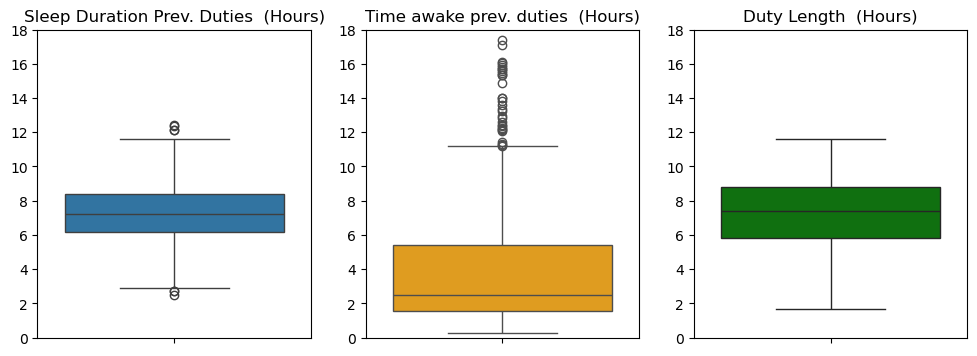

,sleep_duration,time_awake,duty_length
count,431.00,429.00,429.00
mean,7.17,4.05,7.17
std,1.77,3.69,2.38
min,2.47,0.25,1.68
25%,6.17,1.53,5.80
50%,7.20,2.50,7.37
75%,8.38,5.40,8.78
max,12.42,17.40,11.58


In [40]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize=(12,4))
sns.boxplot(data = temp, y='sleep_duration', ax = ax[0])
ax[0].set_title('Sleep Duration Prev. Duties  (Hours)')
ax[0].set_ylabel('')
ax[0].set_ylim(0, 18)
sns.boxplot(data = temp, y='time_awake', ax = ax[1], color = 'orange')
ax[1].set_title('Time awake prev. duties  (Hours)')
ax[1].set_ylabel('')
ax[1].set_ylim(0, 18)
sns.boxplot(data = temp, y='duty_length', ax = ax[2], color = 'green')
ax[2].set_title('Duty Length  (Hours)')
ax[2].set_ylabel('')
ax[2].set_ylim(0, 18)
plt.show()

temp.describe().round(2)

Resume measurements and boxplots of duration variables are presented above. We can see that the variables sleep duration before workload and workload length, approximately have a symetric behaviour, presenting mean and media near to each other, indicating that:

* The participants in mean sleep about 7 hours before duty period;

* The workload length in mean is about 7 hours.

The variable time awake before the duty period has an assimetric behaviour, so the median is more representative of the average participants behaviour than the mean, thus,

* Before duty periods, the participants in average were about 2 hours and 30 min awake.

## 3.2. Distribution of Duration Variables with kss (Perception of Sleepiness)

In [42]:
temp = working_df[['kssd','spsd','duty_moment','duty_start_cat',
                   'sleep_duration','time_awake','duty_length']].copy()


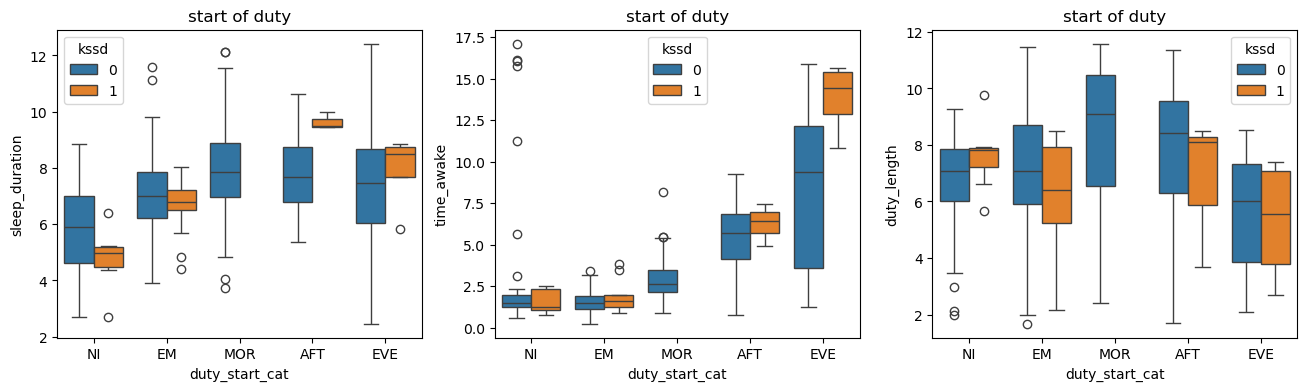

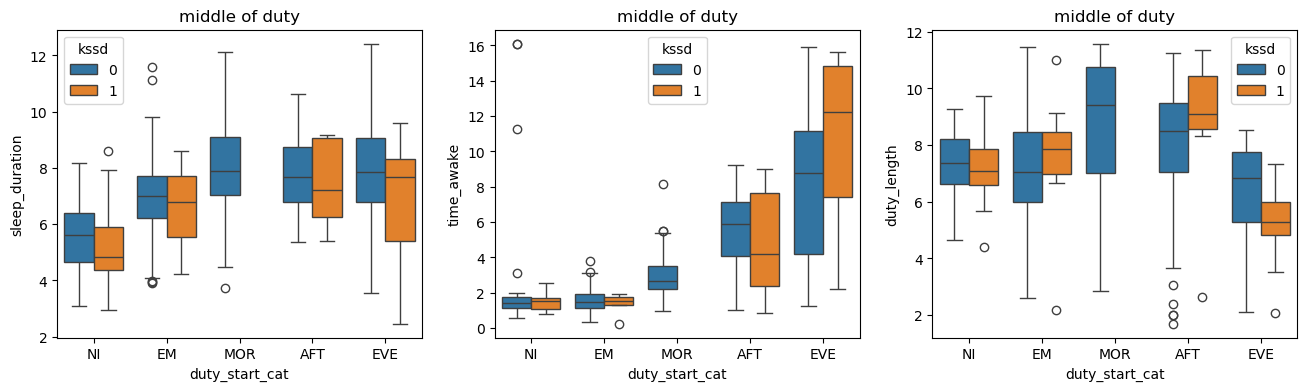

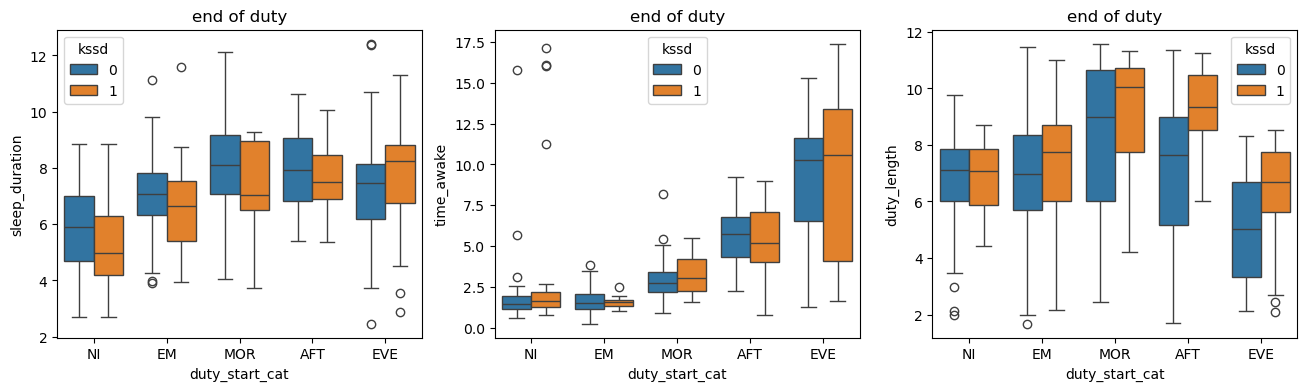

In [44]:
#temp = working_df[['kssd','spsd','time_fill_kss_sps', 'duty_moment', 'sleep_duration', 
#                   'time_awake', 'duty_length','id']].copy()

fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize=(16,4))
temp0 = temp.loc[temp.duty_moment == 'start'].copy()
sns.boxplot(data = temp0, x = 'duty_start_cat', y = 'sleep_duration', hue = 'kssd', order = ['NI','EM','MOR','AFT','EVE'], ax = ax[0])
sns.boxplot(data = temp0, x = 'duty_start_cat', y = 'time_awake', hue = 'kssd', order = ['NI','EM','MOR','AFT','EVE'], ax = ax[1])
sns.boxplot(data = temp0, x = 'duty_start_cat', y = 'duty_length', hue = 'kssd', order = ['NI','EM','MOR','AFT','EVE'], ax = ax[2])
ax[0].set_title('start of duty')
ax[1].set_title('start of duty')
ax[2].set_title('start of duty')
plt.show()

fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize=(16,4))
temp0 = temp.loc[temp.duty_moment == 'middle'].copy()
sns.boxplot(data = temp0, x = 'duty_start_cat', y = 'sleep_duration', hue = 'kssd', order = ['NI','EM','MOR','AFT','EVE'], ax = ax[0])
sns.boxplot(data = temp0, x = 'duty_start_cat', y = 'time_awake', hue = 'kssd', order = ['NI','EM','MOR','AFT','EVE'], ax = ax[1])
sns.boxplot(data = temp0, x = 'duty_start_cat', y = 'duty_length', hue = 'kssd', order = ['NI','EM','MOR','AFT','EVE'], ax = ax[2])
ax[0].set_title('middle of duty')
ax[1].set_title('middle of duty')
ax[2].set_title('middle of duty')
plt.show()

fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize=(16,4))
temp0 = temp.loc[temp.duty_moment == 'end'].copy()
sns.boxplot(data = temp0, x = 'duty_start_cat', y = 'sleep_duration', hue = 'kssd', order = ['NI','EM','MOR','AFT','EVE'], ax = ax[0])
sns.boxplot(data = temp0, x = 'duty_start_cat', y = 'time_awake', hue = 'kssd', order = ['NI','EM','MOR','AFT','EVE'], ax = ax[1])
sns.boxplot(data = temp0, x = 'duty_start_cat', y = 'duty_length', hue = 'kssd', order = ['NI','EM','MOR','AFT','EVE'], ax = ax[2])
ax[0].set_title('end of duty')
ax[1].set_title('end of duty')
ax[2].set_title('end of duty')
plt.show()

Above is shown boxplots representing the duration variables with perception of excessive sleepiness and the evolution along the time the duty period start, for the moments start of duty, middle of duty and end of duty. Analyzing all these graphs, the following results stands out:

* For time awake before duty period and duties starting at the EVE period (second upper figure from left to right), we can see that percpetion of severe sleepiness cases are associated with more time awake before workload than for non severe sleepiness cases.

* For sleepduration and duties starting at the AFT period (first upper figure from left to right), we can see that perception of severe sleepiness cases are associated with greater sleep duration than for non severe sleepiness cases.

## 3.3. Distribution of Duration Variables with sps (Perception of fatigue)

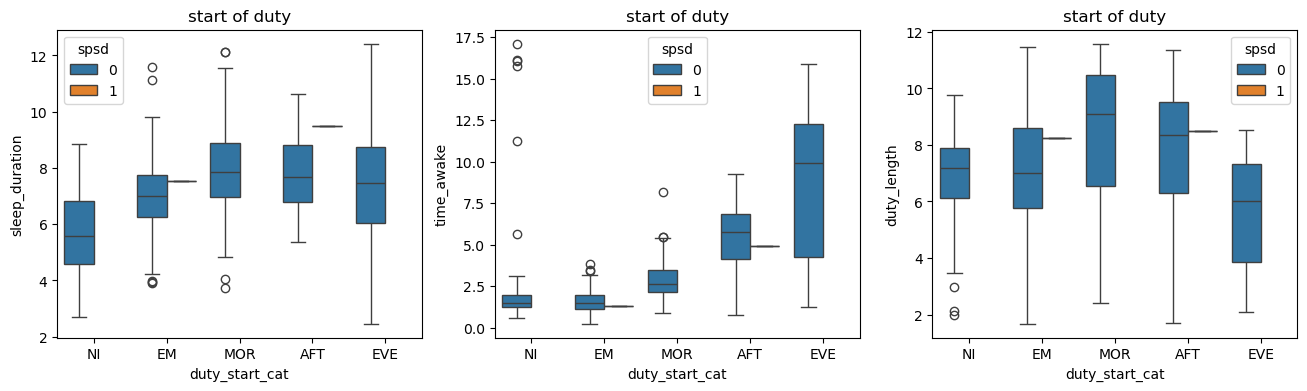

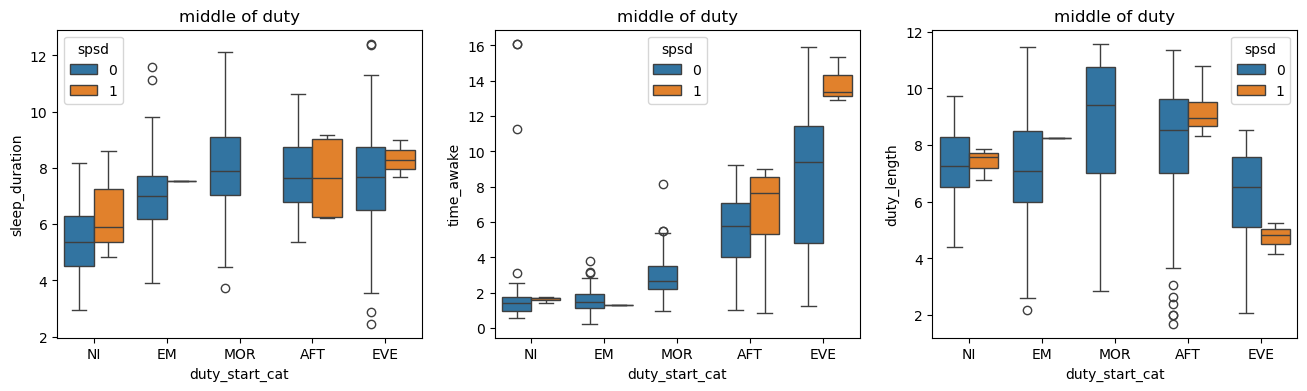

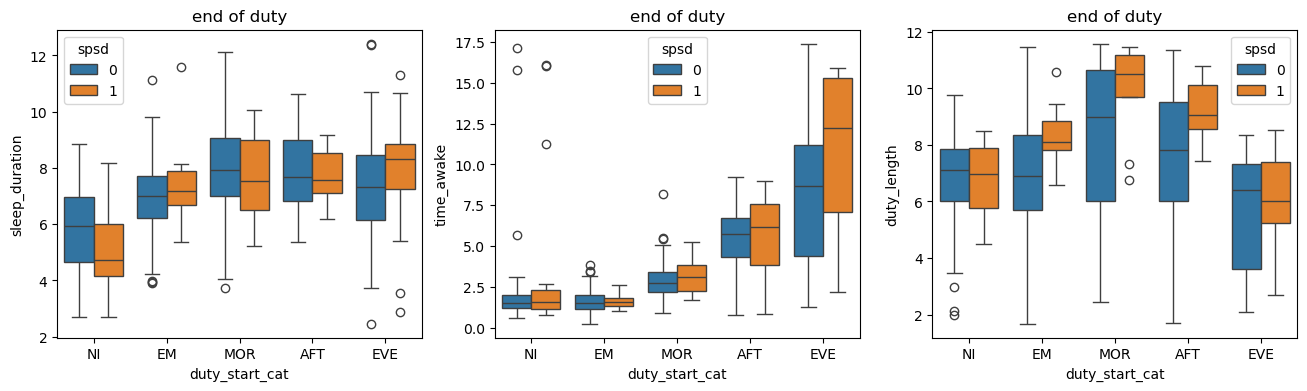

In [46]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize=(16,4))
temp0 = temp.loc[temp.duty_moment == 'start'].copy()
sns.boxplot(data = temp0, x = 'duty_start_cat', y = 'sleep_duration', hue = 'spsd', order = ['NI','EM','MOR','AFT','EVE'], ax = ax[0])
sns.boxplot(data = temp0, x = 'duty_start_cat', y = 'time_awake', hue = 'spsd', order = ['NI','EM','MOR','AFT','EVE'], ax = ax[1])
sns.boxplot(data = temp0, x = 'duty_start_cat', y = 'duty_length', hue = 'spsd', order = ['NI','EM','MOR','AFT','EVE'], ax = ax[2])
ax[0].set_title('start of duty')
ax[1].set_title('start of duty')
ax[2].set_title('start of duty')
plt.show()

fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize=(16,4))
temp0 = temp.loc[temp.duty_moment == 'middle'].copy()
sns.boxplot(data = temp0, x = 'duty_start_cat', y = 'sleep_duration', hue = 'spsd', order = ['NI','EM','MOR','AFT','EVE'], ax = ax[0])
sns.boxplot(data = temp0, x = 'duty_start_cat', y = 'time_awake', hue = 'spsd', order = ['NI','EM','MOR','AFT','EVE'], ax = ax[1])
sns.boxplot(data = temp0, x = 'duty_start_cat', y = 'duty_length', hue = 'spsd', order = ['NI','EM','MOR','AFT','EVE'], ax = ax[2])
ax[0].set_title('middle of duty')
ax[1].set_title('middle of duty')
ax[2].set_title('middle of duty')
plt.show()

fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize=(16,4))
temp0 = temp.loc[temp.duty_moment == 'end'].copy()
sns.boxplot(data = temp0, x = 'duty_start_cat', y = 'sleep_duration', hue = 'spsd', order = ['NI','EM','MOR','AFT','EVE'], ax = ax[0])
sns.boxplot(data = temp0, x = 'duty_start_cat', y = 'time_awake', hue = 'spsd', order = ['NI','EM','MOR','AFT','EVE'], ax = ax[1])
sns.boxplot(data = temp0, x = 'duty_start_cat', y = 'duty_length', hue = 'spsd', order = ['NI','EM','MOR','AFT','EVE'], ax = ax[2])
ax[0].set_title('end of duty')
ax[1].set_title('end of duty')
ax[2].set_title('end of duty')
plt.show()

Above is shown boxplots representing the duration variables with perception of excessive sleepiness and the evolution along the time the duty period start, for the moments start of duty, middle of duty and end of duty. Analyzing all these graphs, the following results stands out:

* For time awake before the duty period at middle duty period for duties starting at evening (second middle graph from left to right), we see that perception of severe fatigue is related to higher time awake before duty than for non severe cases. 

# 4. Relative to Naps

## 4.1. Number of Naps

In [51]:
x1 = pd.crosstab(working_df['kssd'], working_df['nap_number'], rownames=['Sleepiness'], 
                 colnames=['nap_number'], margins=True, normalize='index')

x2 = pd.crosstab(working_df['spsd'], working_df['nap_number'], rownames=['Fatigue'], 
                 colnames=['nap_number'], margins=True, normalize='index')

print(''); print('')
display_side_by_side( [x1,x2], ['(a) # Naps During duties - Excessive Sleepiness', '(b) # Naps During duties - Severe Fatigue'] )
print(''); print('')

nap_number,0,1,2
Sleepiness,,,
0,0.70,0.25,0.05
1,0.55,0.39,0.05
All,0.68,0.28,0.05
nap_number,0,1,2
Fatigue,,,
0,0.68,0.27,0.05
1,0.58,0.37,0.06
All,0.68,0.28,0.05


Contingency tables between number of naps during duties and perception of excessive/severe sleepiness/fatigue is shown. 

* The tables present peaks of frequency at 0 naps for both indicators and for conditions of excessive/severe sleepiness/fatigue as well for mild conditions, indicating that the number of naps is not associated with the targets.

# 5. Sociodemographic Variables

In [53]:
temp = working_df[['Id','Sex','Position','Num_Sons','Education','Marital_status','Time_displacement', 'Flight_hours', 'Age']].copy().drop_duplicates()
temp['Flight_hours'] = temp['Flight_hours']/1000             # each 1k hour
temp['Time_displacement'] = temp['Time_displacement']/60     # each 1 hour
temp.head(5).round(2)

,Id,Sex,Position,Num_Sons,Education,Marital_status,Time_displacement,Flight_hours,Age
0,P01,MALE,CMTE,2,PHD,MARRIED,1.00,17.0,49
43,P02,MALE,CMTE,2,ESPEC,MARRIED,0.33,17.0,57
78,P03,MALE,CMTE,1,ESPEC,NON_STABLE,7.00,8.0,42
114,P04,MALE,CMTE,0,ESPEC,MARRIED,0.33,5.2,34
124,P05,MALE,COPIL,0,UNIV_INC,DIVORCED,0.50,11.0,41


## 5.1. Continuous variables

In [55]:
temp[['Time_displacement', 'Flight_hours', 'Age']].describe().round(2)

,Time_displacement,Flight_hours,Age
count,48.00,47.00,48.00
mean,1.96,8.08,40.56
std,1.78,5.89,10.21
min,0.17,1.50,25.00
25%,0.50,3.50,32.00
50%,1.04,6.50,39.50
75%,3.50,11.50,48.25
max,7.00,29.00,66.00


* Resume measurements for flight hours and time displacement is shown above. As we can see both the variables are assimetric toward low values, presenting the median less than the mean, with the median of about 6.5k and 1 hours respectively.

## 5.2. Categorical features

In [57]:
x1 = temp['Sex'].value_counts().to_frame()
x2 = temp['Position'].value_counts().to_frame()
x3 = temp['Education'].value_counts().to_frame()
x4 = temp['Marital_status'].value_counts().to_frame()
x5 = temp['Num_Sons'].astype(str).value_counts().to_frame()

print(''); print('')
display_side_by_side( [x1,x2,x3,x4,x5], ['(a)', '(b)', '(c)', '(d)', '(e)'] )
print(''); print('')

,count
Sex,
MALE,41
FEMALE,7
,count
Position,
CMTE,25
COPIL,23
,count
Education,
UNIV_COMP,21


A summary for categorical sociodemographic variables is shown above. Some variables can be recategorized, such as:

* Education into High (higher education) and N_High (non-higher education),so categories such as UNIV_COMP, ESPEC, PHD and ME categorized into High and ENS_MED_COMP, UNIV_INC into N_High.

* Marital Status in to Married and single, where MARRIED, STABLE_UNION into Married and SINGLE, NON_STABLE and DIVORCED into Single.

## 5.3. Description of an Average Participant

| Individuals | Account |
| --- | --- |
| Men | 41 |
| Women | 7 |
| Pilot | 25 |
| Co-pilot | 23 |
| Married | 29 |
| Higher Educated | 29 |
| Have at least one child | 27 |


| Variable | Mean (std) |
| --- | --- |
| age | 40 (10) |
| flight hours | 8k hours (5k hours) |
| time home-work | 1.96 hours (1.47 hours) |


# 6. Other Variables

In [65]:
temp = working_df[['Id','Classification','Disturbed_sleep','Awakening','Sleep_Fatig']].copy().drop_duplicates()
temp.head(5)

,Id,Classification,Disturbed_sleep,Awakening,Sleep_Fatig
0,P01,INT,13,9,14
43,P02,INT,6,3,25
78,P03,MAT,11,7,10
114,P04,INT,11,9,12
124,P05,VES,18,11,18


## 6.1. Chronotype

In [67]:
temp['Classification'].value_counts().to_frame()

,count
Classification,
INT,24
MAT,16
VES,8


Above the participants chronotype table is shown. As we can see, most of participants are chronotype Intermediary, in other words, this means that most of the participants are more prone to work or have better cognitive performance during afternoon period.

## 6.2. Karolinska 6 months Questionnaire

In [69]:
temp[['Disturbed_sleep','Awakening','Sleep_Fatig']].describe().round(2)

,Disturbed_sleep,Awakening,Sleep_Fatig
count,48.00,48.00,48.00
mean,11.15,8.31,15.77
std,3.07,2.20,3.42
min,4.00,3.00,8.00
25%,9.00,7.00,14.00
50%,11.00,8.00,15.50
75%,13.25,10.00,18.00
max,18.00,13.00,25.00


Above the result from KSQ questionnaire is shown, measuring the perceived quality of sleep in previous 6 months, as greater, bad is the qualities assigned. Both mean and median are near each other for all the quantities, meaning an approximate simetrical behaviour in terms of distribution. The average values for disturbed sleep, Awakenings and Sleep-Faigue are 11.15, 8.31, 15.77, respectively, either with low standard deviation.

In [71]:
temp[['Disturbed_sleep','Awakening','Sleep_Fatig']].corr().round(2)

,Disturbed_sleep,Awakening,Sleep_Fatig
Disturbed_sleep,1.00,0.79,0.35
Awakening,0.79,1.00,0.37
Sleep_Fatig,0.35,0.37,1.00


Pearson correlation analysis among these set of variables is shown above. We can see that Disturbed sleep and Awakening are strongly correlated and sleep fatig are weakly correlated with the other two variables. So, thinking in terms of regression anlysis, we can not use the two variables together without any treatment or combination.

# 7. Conclusions 

## 7.1. Social and Professional Profiles

In [86]:
# Education
recat = {'UNIV_COMP':'univ', 'ESPEC':'univ', 'UNIV_INC':'non_univ', 'ENS_MED_COMP':'non_univ', 'PHD':'univ', 'ME':'univ'}
working_df.loc[:,'education'] = working_df.loc[:,'Education'].copy().apply(lambda x: recat[x])

# Marital_status
recat = {'MARRIED':'married', 'STABLE_UNION':'married', 'SINGLE':'single', 'DIVORCED':'single', 'NON_STABLE':'single'}
working_df.loc[:,'marital_status'] = working_df.loc[:,'Marital_status'].copy().apply(lambda x: recat[x])

### 7.4.2. Selecting variables

In [90]:
variables = ['Id','Record_time_stamp','kss','sps','kssd','spsd','time_fill_kss_sps', 'duty_moment', 'duty_type_2', 
             'duty_type_prev_es','duty_type_prev_nt', 'duty_length', 'sleep_duration', 'time_awake', 'duty_start_cat', 
             'Sleep_quality',  'Bedtime_start', 'Bedtime_end',
             'Sex', 'Position', 'Num_Sons', 'Flight_hours', 'education', 'marital_status', 'Time_displacement','Age',
             'Disturbed_sleep', 'Awakening', 'Sleep_Fatig','Classification','nap_number' ]

df_out = working_df[variables].merge(selected, how = 'right', on = 'Id')
df_out.head(5)

,Id,Record_time_stamp,kss,sps,kssd,spsd,time_fill_kss_sps,duty_moment,duty_type_2,duty_type_prev_es,...,education,marital_status,Time_displacement,Age,Disturbed_sleep,Awakening,Sleep_Fatig,Classification,nap_number,select
0,P01,07/12/2021 12:21,5,4.0,0,0,AFT,start,others,0,...,univ,married,60,49,13,9,14,INT,0,1
1,P01,07/12/2021 19:57,5,5.0,0,0,EVE,middle,others,0,...,univ,married,60,49,13,9,14,INT,0,1
2,P01,08/12/2021 00:15,7,6.0,1,1,NI,end,others,0,...,univ,married,60,49,13,9,14,INT,0,1
3,P01,09/12/2021 05:20,7,5.0,1,0,EM,start,others,0,...,univ,married,60,49,13,9,14,INT,0,1
4,P01,09/12/2021 09:50,4,3.0,0,0,MOR,middle,others,0,...,univ,married,60,49,13,9,14,INT,0,1


### 7.4.4. Saving processed data base 

In [92]:
ofile = os.path.join('data/processed_to_regression.csv')
try:
    df_out.to_csv(ofile, index=False)
    print('---------------------------------------------------------')
    print(f'Success! Data recorded in file: {ofile}')
    print('---------------------------------------------------------')
except:
    print('---------------------------------------------------------')
    print(f'Data not recorded in file: {ofile}, verify!')
    print('---------------------------------------------------------')

---------------------------------------------------------
Success! Data recorded in file: data/processed_to_regression.csv
---------------------------------------------------------
